In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

# 데이터셋 불러오기
data_path = '/content/drive/MyDrive/Colab Notebooks/Cancer_Data.csv'
cancer_data = pd.read_csv(data_path)

# 특징(features)과 타겟(target) 변수 분리
X = cancer_data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], errors='ignore')
y = cancer_data['diagnosis']

# Train : Test = 8 : 2 비율로 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 초기화 (n_neighbors=3) 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = knn.predict(X_test)

# classification_report 출력
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           B       0.93      0.96      0.94        71
           M       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



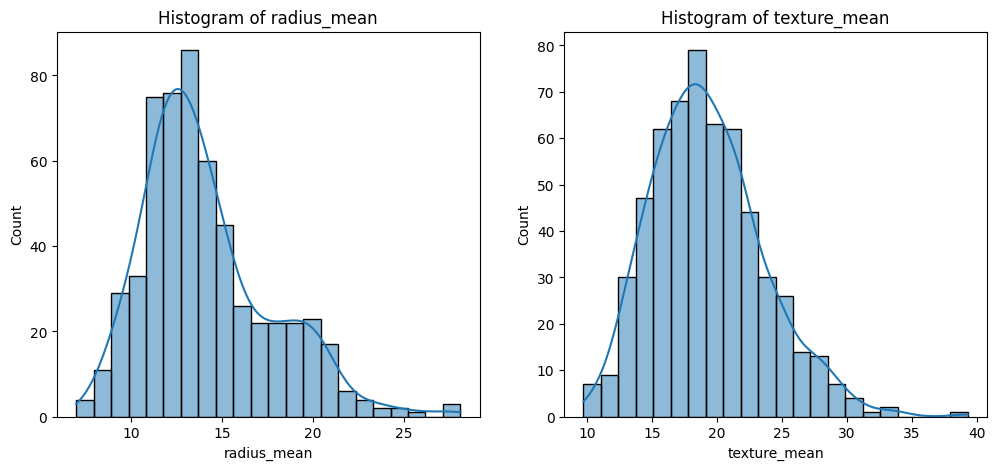

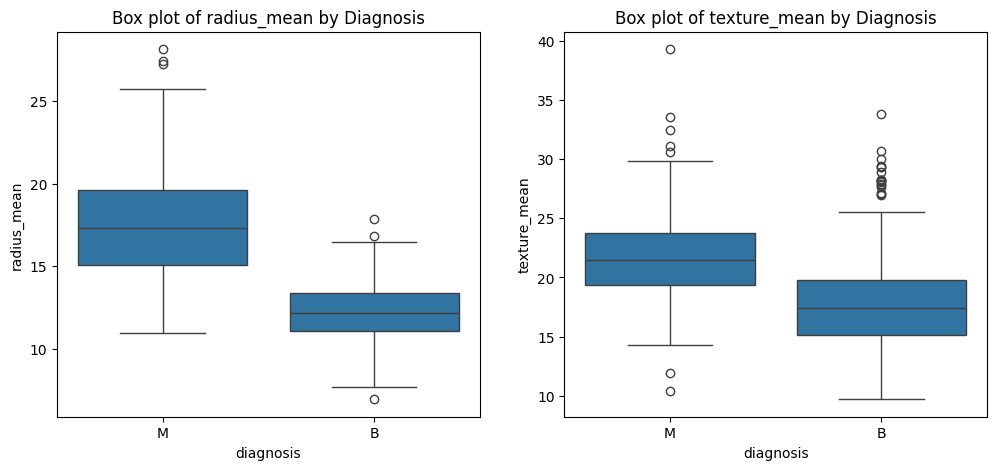

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'radius_mean'
feature2 = 'texture_mean'

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cancer_data[feature1], kde=True)
plt.title(f'Histogram of {feature1}')

plt.subplot(1, 2, 2)
sns.histplot(cancer_data[feature2], kde=True)
plt.title(f'Histogram of {feature2}')

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='diagnosis', y=feature1, data=cancer_data)
plt.title(f'Box plot of {feature1} by Diagnosis')

plt.subplot(1, 2, 2)
sns.boxplot(x='diagnosis', y=feature2, data=cancer_data)
plt.title(f'Box plot of {feature2} by Diagnosis')

plt.show()

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

X = cancer_data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], errors='ignore')
y = cancer_data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Encode diagnosis as 1 for 'M' and 0 for 'B'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))
X_no_outliers = X_scaled[(z_scores < 3).all(axis=1)]
y_no_outliers = y[(z_scores < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Optimal number of neighbors: {best_k}')
print(f'Accuracy after preprocessing and hyperparameter tuning: {accuracy:.2f}')
print(classification_rep)

Optimal number of neighbors: 3
Accuracy after preprocessing and hyperparameter tuning: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.97      0.92      0.95        38

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.96        99
weighted avg       0.96      0.96      0.96        99



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
